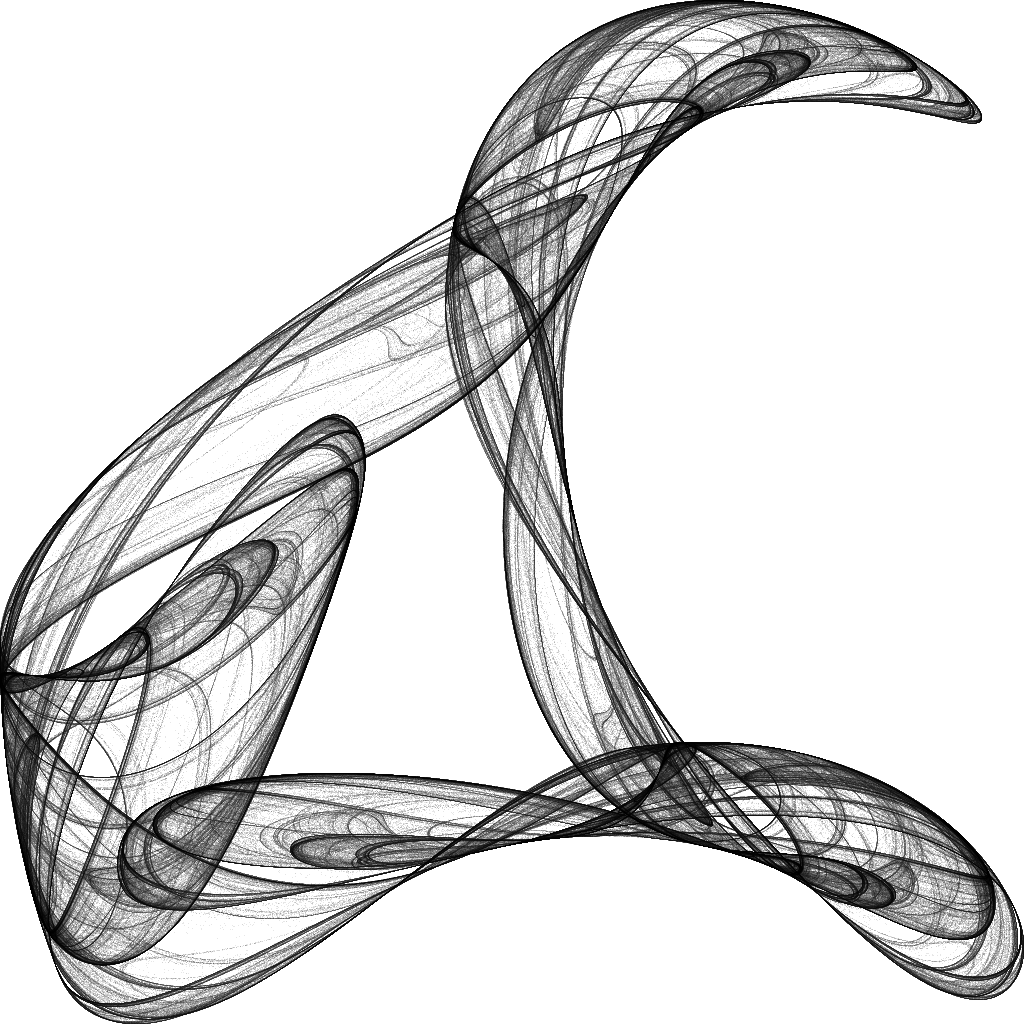

In [1]:
import numpy as np, pandas as pd, datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import inferno, viridis
from numba import jit
from math import sin, cos, sqrt, fabs


# Set the number of points to calculate, takes about a second with
# 10 million
n=10000000

# The clifford attractor code, JIT compiled using numba
@jit(nopython=True)
def Clifford(x, y, a, b, c, d, *o):
    return sin(a * y) + c * cos(a * x), \
           sin(b * x) + d * cos(b * y)

# Coordinate calculation, also JIT compiled
@jit(nopython=True)
def trajectory_coords(fn, x0, y0, a, b=0, c=0, d=0, e=0, f=0, n=n):
    x, y = np.zeros(n), np.zeros(n)
    x[0], y[0] = x0, y0
    for i in np.arange(n-1):
        x[i+1], y[i+1] = fn(x[i], y[i], a, b, c, d, e, f)
    return x,y


def trajectory(fn, x0, y0, a, b=0, c=0, d=0, e=0, f=0, n=n):
    x, y = trajectory_coords(fn, x0, y0, a, b, c, d, e, f, n)
    return pd.DataFrame(dict(x=x,y=y))


# Calculate the pandas.DataFrame
df = trajectory(Clifford, 0, 0, -1.7, 1.5, -0.5, 0.7)

# Create a canvas and render
cvs = ds.Canvas(plot_width=1024, plot_height=1024)
agg = cvs.points(df, 'x', 'y')
tf.shade(agg, cmap=["white", "black"])